# Параллельные вычисления

Материалы:
* Макрушин С.В. Лекция 10: Параллельные вычисления
* https://docs.python.org/3/library/multiprocessing.html

## Задачи для совместного разбора

1. Посчитайте, сколько раз встречается каждый из символов (заглавные и строчные символы не различаются) в файле `Dostoevskiy Fedor. Prestuplenie i nakazanie - BooksCafe.Net.txt` и в файле `Dostoevskiy Fedor. Igrok - BooksCafe.Net.txt`. 

In [ ]:
from collections import Counter
f=open("Dostoevskiy Fedor. Prestuplenie i nakazanie - BooksCafe.Net.txt", encoding='windows-1251') 
a=open("Dostoevskiy Fedor. Igrok - BooksCafe.Net.txt",  encoding='windows-1251')
text = f.read()
text1 = a.read()
counter = Counter(text)
counter2 = Counter(text1)
all=[]
all.append(counter)
all.append(counter2)
all

[Counter({'С': 1740,
          'п': 23347,
          'а': 72242,
          'с': 48344,
          'и': 60909,
          'б': 15721,
          'о': 105231,
          ',': 26973,
          ' ': 182305,
          'ч': 16075,
          'т': 59086,
          'к': 29878,
          'л': 41864,
          'н': 58962,
          'г': 15855,
          'у': 27076,
          'в': 42107,
          'е': 80661,
          'й': 9746,
          'э': 2718,
          'р': 37785,
          'B': 4,
          'o': 103,
          'k': 16,
          's': 96,
          'C': 12,
          'a': 91,
          'f': 23,
          'e': 162,
          '.': 9864,
          'N': 3,
          't': 98,
          ':': 984,
          'h': 44,
          'p': 25,
          '/': 22,
          'b': 21,
          'c': 30,
          'n': 111,
          '\n': 8583,
          'В': 1593,
          'u': 86,
          'r': 76,
          'd': 29,
          'v': 24,
          'i': 79,
          'y': 5,
          '_': 8,
          '-': 3558

2. Решить задачу 1, распараллелив вычисления с помощью модуля `multiprocessing`. Для обработки каждого файла создать свой собственный процесс. 

In [ ]:
import multiprocessing as mp
from multiprocessing import Process
from collections import Counter
def opening(file):
  f = open(file, 'r', encoding='windows-1251')
  text = f.read()
  counter = Counter(text)
  return counter


In [ ]:

if __name__ == "__main__":
    files = ["Dostoevskiy Fedor. Igrok - BooksCafe.Net.txt", "Dostoevskiy Fedor. Prestuplenie i nakazanie - BooksCafe.Net.txt"]
    with mp.Pool(processes=len(files)) as pool:
        counters = pool.map(opening, files)

print(len(counters))


2


In [ ]:
counters

[Counter({'С': 147,
          'п': 5021,
          'а': 17948,
          'с': 11360,
          'и': 13405,
          'б': 3873,
          'о': 22832,
          ',': 6372,
          ' ': 45076,
          'ч': 4011,
          'т': 14063,
          'к': 6563,
          'л': 9948,
          'н': 13773,
          'г': 3731,
          'у': 5993,
          'в': 9021,
          'е': 19969,
          'й': 2028,
          'э': 728,
          'р': 9421,
          'B': 151,
          'o': 371,
          'k': 21,
          's': 422,
          'C': 35,
          'a': 579,
          'f': 49,
          'e': 1191,
          '.': 2954,
          'N': 7,
          't': 324,
          ':': 212,
          'h': 223,
          'p': 88,
          '/': 20,
          'b': 69,
          'c': 289,
          'n': 452,
          '\n': 2734,
          'В': 377,
          'u': 283,
          'r': 303,
          'd': 185,
          'v': 71,
          'i': 343,
          'y': 8,
          '_': 4,
          '-': 900,
  

## Лабораторная работа 10

1. Разбейте файл `recipes_full.csv` на несколько (например, 8) примерно одинаковых по объему файлов c названиями `id_tag_nsteps_*.csv`. Каждый файл содержит 3 столбца: `id`, `tag` и `n_steps`, разделенных символом `;`. Для разбора строк используйте `csv.reader`.

__Важно__: вы не можете загружать в память весь файл сразу. Посмотреть на первые несколько строк файла вы можете, написав код, который считывает эти строки.

Подсказка: примерное кол-во строк в файле - 2.3 млн.

```
id;tag;n_steps
137739;60-minutes-or-less;11
137739;time-to-make;11
137739;course;11
```


In [ ]:
import pandas as pd 
df=pd.read_csv('recipes_sample_with_tags_ingredients.csv', index_col='id')
df

,Unnamed: 0,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,n_tags,tags,ingredients
id,,,,,,,,,,,
44123,0,george s at the cove black bean soup,90,35193,2002-10-25,11,an original recipe created by chef scott meska...,18,25,weeknight;time-to-make;course;main-ingredient;...,unsalted butter*carrot*onion*celery*broccoli s...
67664,1,healthy for them yogurt popsicles,10,91970,2003-07-26,3,my children and their friends ask for my homem...,3,31,15-minutes-or-less;time-to-make;course;prepara...,milk*frozen juice concentrate*plain yogurt
38798,2,i can t believe it s spinach,30,1533,2002-08-29,5,"these were so go, it surprised even me.",8,17,30-minutes-or-less;time-to-make;course;main-in...,onion*frozen chopped spinach*eggs*garlic powde...
35173,3,italian gut busters,45,22724,2002-07-27,7,my sister-in-law made these for us at a family...,9,11,60-minutes-or-less;time-to-make;course;prepara...,sandwich bun*good seasonings italian salad dre...
84797,4,love is in the air beef fondue sauces,25,4470,2004-02-23,4,i think a fondue is a very romantic casual din...,12,19,30-minutes-or-less;time-to-make;course;main-in...,beef steaks*vegetable oil*spicy mustard*fresh ...
...,...,...,...,...,...,...,...,...,...,...,...
267661,29995,zurie s holey rustic olive and cheddar bread,80,200862,2007-11-25,16,this is based on a french recipe but i changed...,10,18,time-to-make;course;main-ingredient;cuisine;pr...,dry white wine*eggs*cheddar cheese*baking powd...
386977,29996,zwetschgenkuchen bavarian plum cake,240,177443,2009-08-24,22,"this is a traditional fresh plum cake, thought...",11,19,time-to-make;course;main-ingredient;cuisine;pr...,unsalted butter*milk*flour*salt*vanilla*all-pu...
103312,29997,zwiebelkuchen southwest german onion cake,75,161745,2004-11-03,10,this is a traditional late summer early fall s...,13,20,time-to-make;course;main-ingredient;cuisine;pr...,onion*milk*eggs*butter*flour*salt*pepper*sugar...


In [ ]:
import pandas as pd
# Задаем путь к файлу
file_path = 'recipes_full.csv'

# Задаем число частей
num_parts = 8

# Задаем столбцы, которые мы хотим оставить
columns_to_keep = ['id', 'tags', 'n_steps']

# Читаем файл и выбираем нужные столбцы
df = pd.read_csv(file_path, usecols=columns_to_keep)

# Разбиваем датафрейм на num_parts частей
df_parts = [df.iloc[i::num_parts] for i in range(num_parts)]

# Создаем отдельный csv-файл для каждой части
for i, part in enumerate(df_parts):
    part.to_csv(f'part_{i}.csv', index=False)



2. Напишите функцию, которая принимает на вход название файла, созданного в результате решения задачи 1, считает среднее значение количества шагов для каждого тэга и возвращает результат в виде словаря.

In [2]:
import pandas as pd

def count_avg_of_tags(file_name):
  df = pd.read_csv(file_name,usecols =  ['tags', 'n_steps'])
  df['tags'] = df['tags'].apply(lambda x: x.strip('][').split(', '))
  df = df.explode('tags')
  df = df.groupby('tags').mean()
  return dict(df)

In [3]:
count_avg_of_tags('part_0.csv')

{'n_steps': tags
 ''                       3.574007
 '1-day-or-more'          4.393090
 '15-minutes-or-less'     4.996918
 '3-steps-or-less'        4.710924
 '30-minutes-or-less'     7.572611
                            ...   
 'wings'                  3.724255
 'winter'                 5.600063
 'yams-sweet-potatoes'    3.922311
 'yeast'                  5.296869
 'zucchini'               3.577552
 Name: n_steps, Length: 552, dtype: float64}

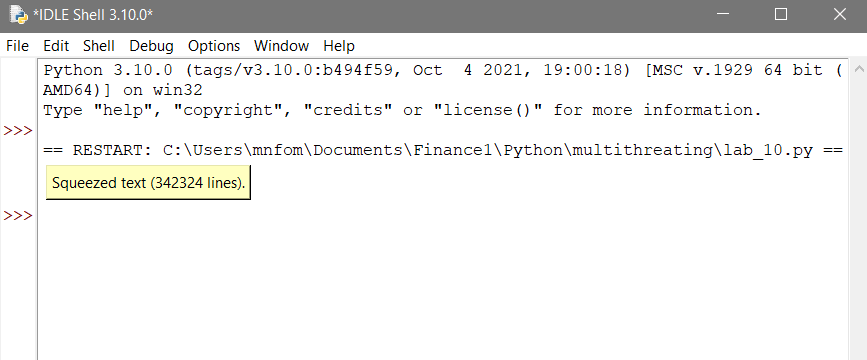

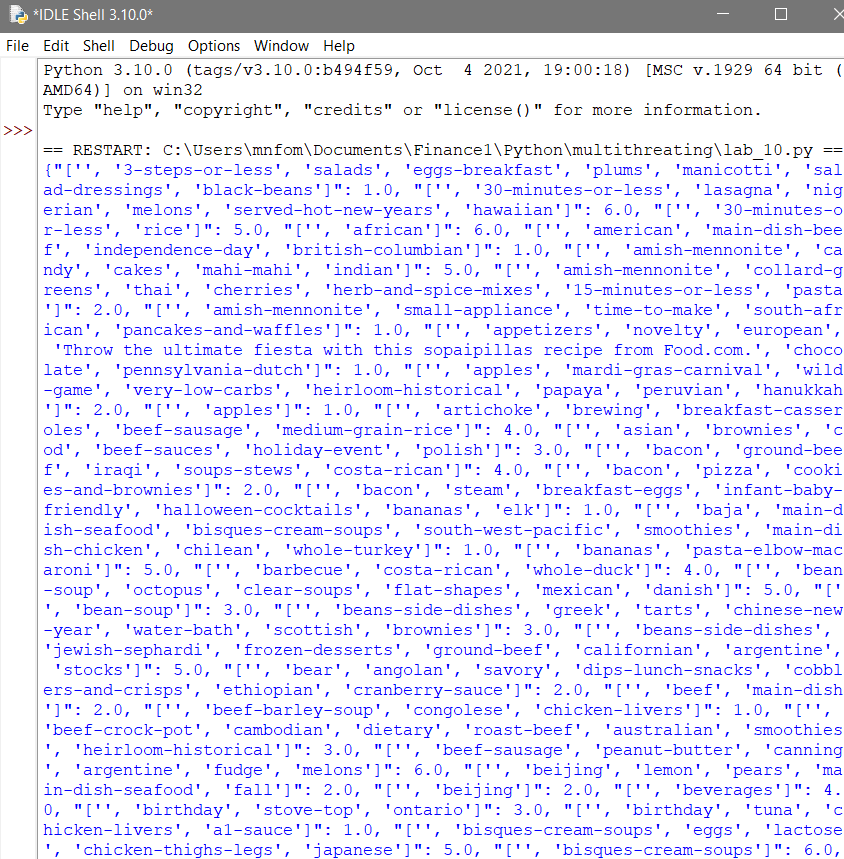

3. Напишите функцию, которая считает среднее значение количества шагов для каждого тэга по всем файлам, полученным в задаче 1, и возвращает результат в виде словаря. Не используйте параллельных вычислений. При реализации выделите функцию, которая объединяет результаты обработки отдельных файлов. Модифицируйте код из задачи 2 таким образом, чтобы иметь возможность получить результат, имея результаты обработки отдельных файлов. Определите, за какое время задача решается для всех файлов.


In [4]:
import time

def join_dicts(list_of_dict):
  final_dict = {}
  first_dict = list(list_of_dict[0].keys())
  for i in range(len(first_dict)):
    key = first_dict[i]
    value = sum([d[key] for d in list_of_dict]) / 8
    final_dict[key] = value
  return final_dict

def new_count_avg_of_tags(list_of_files):
  list_of_dicts = []
  for file_name in list_of_files:
    df = pd.read_csv(file_name,usecols =  ['tags', 'n_steps'])
    df['tags'] = df['tags'].apply(lambda x: x.strip('][').split(', '))
    df = df.explode('tags')
    df = df.groupby('tags').mean()
    list_of_dicts.append(dict(df))
  final_dict = join_dicts(list_of_dicts)
  return final_dict


In [6]:
start_time = time.time()
list_file =  ['part_0.csv','part_1.csv', 'part_2.csv', 'part_3.csv', 'part_4.csv', 'part_5.csv', 'part_6.csv', 'part_7.csv']
d = new_count_avg_of_tags(list_file)
print(f'Время выполнения = {time.time() - start_time}s')
print(d)


Время выполнения = 15.580025672912598s
{'n_steps': tags
''                       3.522457
'1-day-or-more'          4.459970
'15-minutes-or-less'     4.986460
'3-steps-or-less'        4.728812
'30-minutes-or-less'     7.609996
                           ...   
'wings'                  3.698853
'winter'                 5.496131
'yams-sweet-potatoes'    4.005468
'yeast'                  5.178278
'zucchini'               3.587121
Name: n_steps, Length: 552, dtype: float64}


4. Решите задачу 3, распараллелив вычисления с помощью модуля `multiprocessing`. Для обработки каждого файла создайте свой собственный процесс. Определите, за какое время задача решается для всех файлов.

In [7]:
from multiprocessing import Process, Pool
start_time = time.time()
pool = Pool(processes = 8)
list_of_dicts = pool.map(count_avg_of_tags, list_file)
final_dict = join_dicts(list_of_dicts)
print(final_dict)
print(f'Время выполнения = {time.time() - start_time}s')

{'n_steps': tags
''                       3.522457
'1-day-or-more'          4.459970
'15-minutes-or-less'     4.986460
'3-steps-or-less'        4.728812
'30-minutes-or-less'     7.609996
                           ...   
'wings'                  3.698853
'winter'                 5.496131
'yams-sweet-potatoes'    4.005468
'yeast'                  5.178278
'zucchini'               3.587121
Name: n_steps, Length: 552, dtype: float64}
Время выполнения = 13.76306962966919s


In [ ]:
#5

In [8]:
import multiprocessing
import time, random

def count_avg_of_tags(file_name):
  df = pd.read_csv(file_name,usecols =  ['tags', 'n_steps'])
  df['tags'] = df['tags'].apply(lambda x: x.strip('][').split(', '))
  df = df.explode('tags')
  df = df.groupby('tags').mean()
  return dict(df)

In [9]:
def worker(input, output):
    for func, args in iter(input.get, 'STOP'):
        result = calculate(func, args)
        output.put(result)

def calculate(func, args):
    proc_name = multiprocessing.current_process().name
    result = func(*args)
    return f'Результат функции {result}' 

def plus(a, b):
    time.sleep(0.5*random.random())
    return a + b
  
def test():
    NUMBER_OF_PROCESSES = 3
    TASKS1 = [(count_avg_of_tags, (i, )) for i in list_file]

    task_queue = multiprocessing.Queue()
    done_queue = multiprocessing.Queue()

    for task in TASKS1:
        task_queue.put(task)

    for i in range(NUMBER_OF_PROCESSES):
        multiprocessing.Process(target=worker, args=(task_queue, done_queue)).start()

    print('НЕУПОРЯДОЧЕННЫЕ РЕЗУЛЬТАТЫ:\n')
    print('TASKS1:\n')
    for i in range(len(TASKS1)):
        print('\t', done_queue.get())

    print('STOP.')
    for i in range(NUMBER_OF_PROCESSES):
        task_queue.put('STOP')

if __name__ == '__main__':
    start_time = time.time()
    test()
    print(f'Время выполнения = {time.time() - start_time}s')

НЕУПОРЯДОЧЕННЫЕ РЕЗУЛЬТАТЫ:

TASKS1:

	 Результат функции {'n_steps': tags
''                       3.496267
'1-day-or-more'          4.675577
'15-minutes-or-less'     4.955058
'3-steps-or-less'        4.706603
'30-minutes-or-less'     7.643741
                           ...   
'wings'                  3.696003
'winter'                 5.552770
'yams-sweet-potatoes'    4.052239
'yeast'                  5.271312
'zucchini'               3.621062
Name: n_steps, Length: 552, dtype: float64}
	 Результат функции {'n_steps': tags
''                       3.574007
'1-day-or-more'          4.393090
'15-minutes-or-less'     4.996918
'3-steps-or-less'        4.710924
'30-minutes-or-less'     7.572611
                           ...   
'wings'                  3.724255
'winter'                 5.600063
'yams-sweet-potatoes'    3.922311
'yeast'                  5.296869
'zucchini'               3.577552
Name: n_steps, Length: 552, dtype: float64}
	 Результат функции {'n_steps': tags
''             